In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve,auc
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier

import mlflow
import mlflow.sklearn


In [3]:
data = pd.read_csv('C:/Users/anurag_akarte/Desktop/VectorFlow/MLFlow_practic/creditcard/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().values.any()

False

(492, 31) (284315, 31)


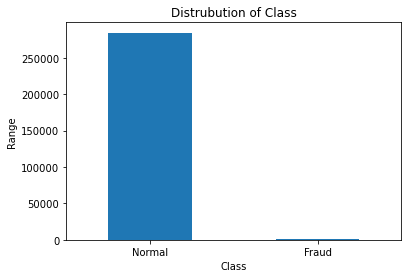

In [6]:
count_classes=pd.value_counts(data['Class'],sort=True)
count_classes.plot(kind='bar',rot=0,)
plt.title('Distrubution of Class')
plt.xlabel('Class')
plt.ylabel('Range')
plt.xticks(range(2),["Normal","Fraud"])
Fraud=data[data['Class']==1]
normal=data[data['Class']==0]
print(Fraud.shape,normal.shape)

In [7]:
# Analyze the Frauid Amount
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

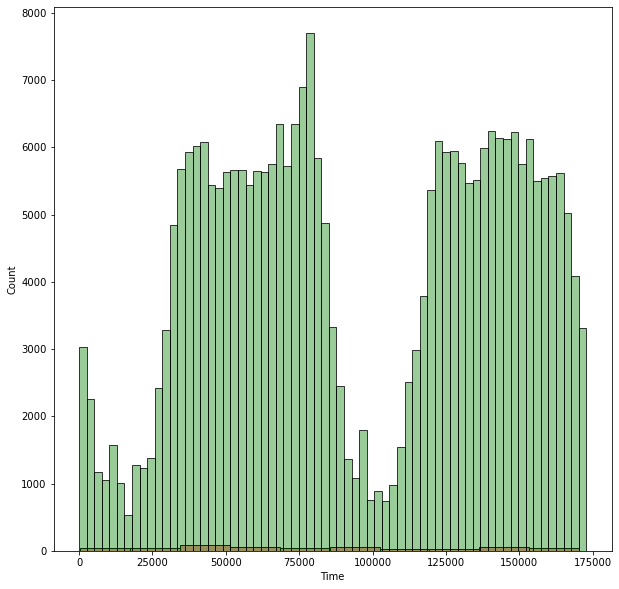

In [8]:
#Analyzing Frauid And Normal Transction With TRansction Time
fig,ax = plt.subplots(figsize=(10,10))
for a,c in zip([Fraud,normal],['r','g']):
    sns.histplot(data=a,x='Time',ax=ax,color=c,alpha=0.4)

In [ ]:
a,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(20,10))
a.suptitle('Amount By class and Treancstion')
bins=50
ax1.hist(Fraud.Amount, bins=bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount,bins=bins)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of Transction')
plt.yscale('log')
plt.xlim((0,20000))
plt.show();

In [9]:
# Ttake Some Sample from Data

dataset = data.sample(frac = 0.1,random_state=1)

dataset.shape

(28481, 31)

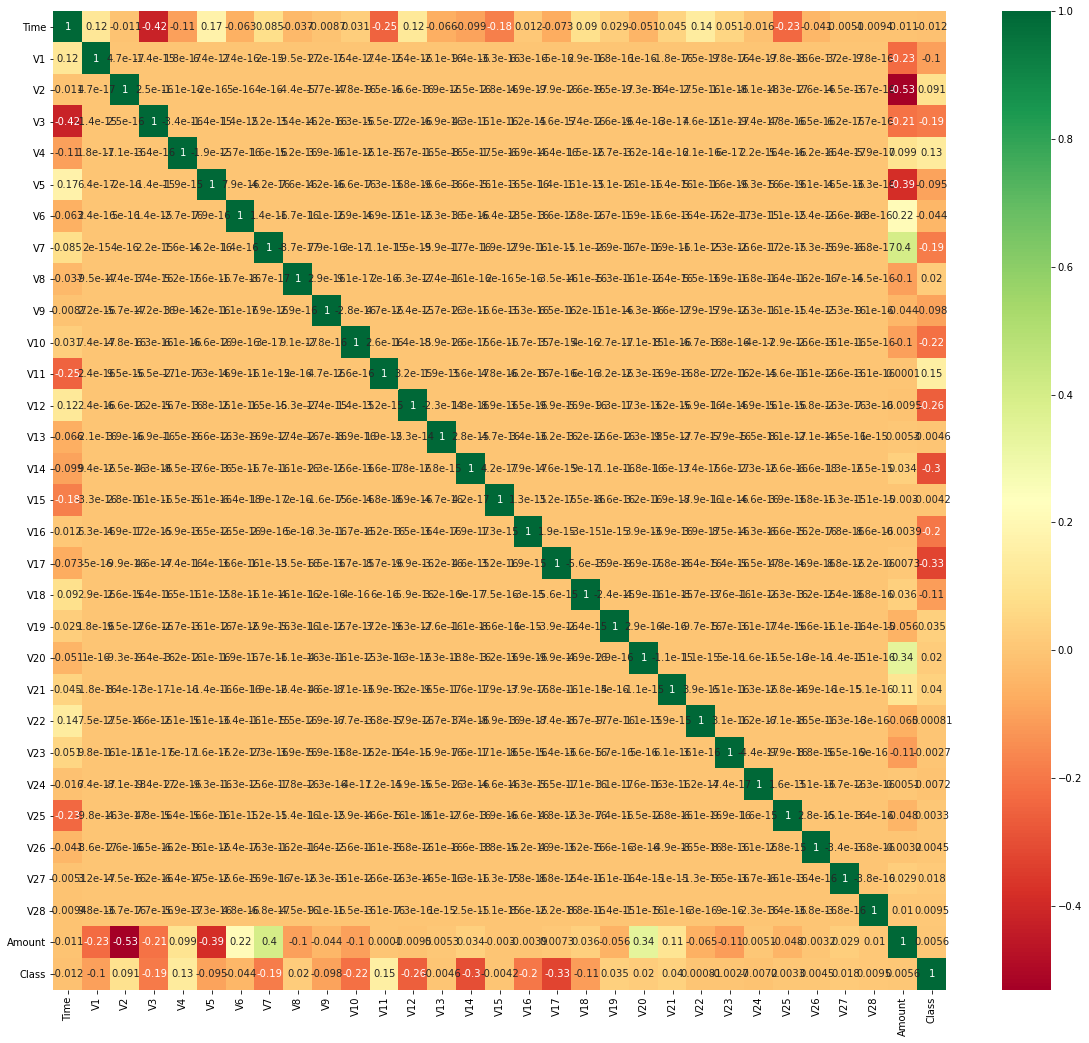

In [5]:
#Get Correlation Matrix
corrmat=data.corr()
top_corr_fig=corrmat.index
plt.figure(figsize=(20,18))
#Heat MAp
g=sns.heatmap(data[top_corr_fig].corr(),annot=True,cmap='RdYlGn')

In [10]:
#Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print(X.shape)
print(y.shape)

(28481, 30)
(28481,)


In [11]:
#Splitting the dataset in to training and testing set
X_train , X_test , y_train , y_test   = train_test_split(X,y,test_size = 0.3 , random_state=42)

# Treatment Of Data

In [12]:
#Handling Unbalanced Data-Over Sampling
from imblearn.combine import SMOTETomek

# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_train,y_train=smk.fit_sample(X_train,y_train)

# Random Forest Alogrithm

In [9]:
mlflow.start_run(nested=True)
# Create a Random Forest Classifier
n_estimators=4
max_features='log2'
criterion='entropy'
max_depth=2
min_samples_split=2
min_samples_leaf=1
random_state=42
rf = RandomForestClassifier(n_estimators=4,max_features='log2',criterion='entropy',max_depth=2,min_samples_split=2,min_samples_leaf=1,random_state=42)

# Train the model using the training sets 
rf.fit(X_train,y_train)
# Prediction on test set
y_pred = rf.predict(X_test)
# Calculating the accuracy
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Random Forest Bayes model : ', acc_rf )

mlflow.log_metric('accuracy',acc_rf)

acc_rf = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
roc = metrics.roc_auc_score(y_test, y_pred)

# confusion matrix values
tp = conf_matrix[0][0]
tn = conf_matrix[1][1]
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]

# get classification metrics
class_report = metrics.classification_report(y_test, y_pred, output_dict=True)
recall_0 = class_report['0']['recall']
f1_score_0 = class_report['0']['f1-score']
recall_1 = class_report['1']['recall']
f1_score_1 = class_report['1']['f1-score']
# log metrics in mlflow
mlflow.log_param('n_estimators',n_estimators)
mlflow.log_param('max_features',max_features)
mlflow.log_param('criterion',criterion)
mlflow.log_param('max_depth',max_depth)
mlflow.log_param('random_state',random_state)

mlflow.log_metric("accuracy_score", acc_rf)
mlflow.log_metric("precision", precision)
mlflow.log_metric("true_positive", tp)
mlflow.log_metric("true_negative", tn)
mlflow.log_metric("false_positive", fp)
mlflow.log_metric("false_negative", fn)
mlflow.log_metric("recall_0", recall_0)
mlflow.log_metric("f1_score_0", f1_score_0)
mlflow.log_metric("recall_1", recall_1)
mlflow.log_metric("f1_score_1", f1_score_1)
mlflow.log_metric("roc", roc)
from mlflow.models.signature import infer_signature
signature = infer_signature(X_train, rf.predict(X_train))
mlflow.sklearn.log_model(rf, "Credit Card RF", signature=signature)

2021/02/23 13:42:59 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



Accuracy of Random Forest Bayes model :  98.82


C:\Users\anurag_akarte\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


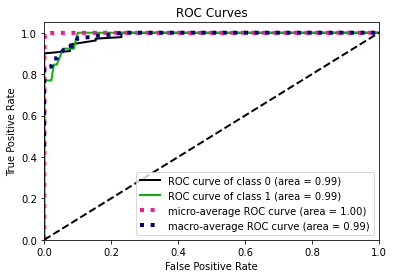

In [10]:
import scikitplot as skplt
y_probas = rf.predict_proba(X_test)
fig=skplt.metrics.plot_roc_curve(y_test,y_probas)
plt.savefig("ROC1.png")
plt.show()
mlflow.log_artifact('C:/Users/anurag_akarte/Desktop/VectorFlow/MLFlow_practic/ROC1.png')
mlflow.end_run()

Accuracy of Random Forest Bayes model :  99.71


C:\Users\anurag_akarte\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


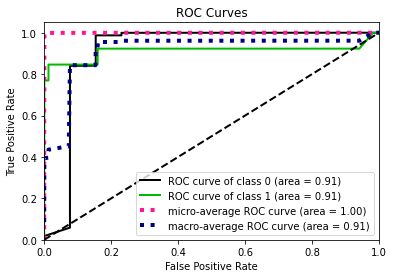

In [11]:
mlflow.start_run(nested=True)
# Create a Random Forest Classifier
n_estimators=6
max_features='sqrt'
criterion='gini'
max_depth=6
min_samples_split=2
min_samples_leaf=1
random_state=100

rf = RandomForestClassifier(n_estimators=6,max_features='sqrt',criterion='gini',max_depth=6,min_samples_split=2,min_samples_leaf=1,random_state=42)

# Train the model using the training sets 
rf.fit(X_train,y_train)
# Prediction on test set
y_pred = rf.predict(X_test)
# Calculating the accuracy
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Random Forest Bayes model : ', acc_rf )

mlflow.log_metric('accuracy',acc_rf)

acc_rf = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
roc = metrics.roc_auc_score(y_test, y_pred)

# confusion matrix values
tp = conf_matrix[0][0]
tn = conf_matrix[1][1]
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]

# get classification metrics
class_report = metrics.classification_report(y_test, y_pred, output_dict=True)
recall_0 = class_report['0']['recall']
f1_score_0 = class_report['0']['f1-score']
recall_1 = class_report['1']['recall']
f1_score_1 = class_report['1']['f1-score']
# log metrics in mlflow
mlflow.log_param('n_estimators',n_estimators)
mlflow.log_param('max_features',max_features)
mlflow.log_param('criterion',criterion)
mlflow.log_param('max_depth',max_depth)
mlflow.log_param('min_samples_split',min_samples_split)

mlflow.log_metric("accuracy_score", acc_rf)
mlflow.log_metric("precision", precision)
mlflow.log_metric("true_positive", tp)
mlflow.log_metric("true_negative", tn)
mlflow.log_metric("false_positive", fp)
mlflow.log_metric("false_negative", fn)
mlflow.log_metric("recall_0", recall_0)
mlflow.log_metric("f1_score_0", f1_score_0)
mlflow.log_metric("recall_1", recall_1)
mlflow.log_metric("f1_score_1", f1_score_1)
mlflow.log_metric("roc", roc)
signature = infer_signature(X_train, rf.predict(X_train))
mlflow.sklearn.log_model(rf, "Credit Card RF", signature=signature)
y_probas = rf.predict_proba(X_test)
fig=skplt.metrics.plot_roc_curve(y_test,y_probas)
plt.savefig("ROC2.png")
plt.show()
mlflow.log_artifact('C:/Users/anurag_akarte/Desktop/VectorFlow/MLFlow_practic/ROC2.png')
mlflow.end_run()

Accuracy of Random Forest Bayes model :  99.89


C:\Users\anurag_akarte\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


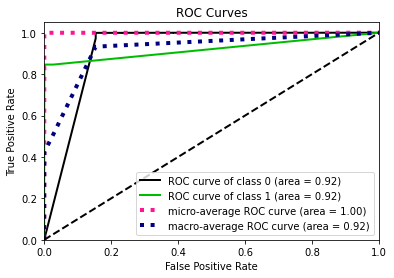

MlflowException: Model Registry features are not supported by the store with URI: 'file:///C:/Users/anurag_akarte/Desktop/VectorFlow/MLFlow_practic/mlruns'. Stores with the following URI schemes are supported: ['databricks', 'http', 'https', 'postgresql', 'mysql', 'sqlite', 'mssql'].

In [21]:
mlflow.start_run(nested=True)
# Create a Random Forest Classifier
n_estimators=6
max_features='log2'
criterion='entropy'
max_depth=10
min_samples_split=2
min_samples_leaf=1
random_state=42

rf = RandomForestClassifier(n_estimators=6,max_features='log2',criterion='entropy',max_depth=10,min_samples_split=2,min_samples_leaf=1,random_state=42)

# Train the model using the training sets 
rf.fit(X_train,y_train)
# Prediction on test set
y_pred = rf.predict(X_test)
# Calculating the accuracy
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Random Forest Bayes model : ', acc_rf )

mlflow.log_metric('accuracy',acc_rf)

acc_rf = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
roc = metrics.roc_auc_score(y_test, y_pred)

# confusion matrix values
tp = conf_matrix[0][0]
tn = conf_matrix[1][1]
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]

# get classification metrics
class_report = metrics.classification_report(y_test, y_pred, output_dict=True)
recall_0 = class_report['0']['recall']
f1_score_0 = class_report['0']['f1-score']
recall_1 = class_report['1']['recall']
f1_score_1 = class_report['1']['f1-score']
# log metrics in mlflow
mlflow.log_param('n_estimators',n_estimators)
mlflow.log_param('max_features',max_features)
mlflow.log_param('criterion',criterion)
mlflow.log_param('max_depth',max_depth)
mlflow.log_param('random_state',random_state)

mlflow.log_metric("accuracy_score", acc_rf)
mlflow.log_metric("precision", precision)
mlflow.log_metric("true_positive", tp)
mlflow.log_metric("true_negative", tn)
mlflow.log_metric("false_positive", fp)
mlflow.log_metric("false_negative", fn)
mlflow.log_metric("recall_0", recall_0)
mlflow.log_metric("f1_score_0", f1_score_0)
mlflow.log_metric("recall_1", recall_1)
mlflow.log_metric("f1_score_1", f1_score_1)
mlflow.log_metric("roc", roc)
from mlflow.models.signature import infer_signature
signature = infer_signature(X_train, rf.predict(X_train))
mlflow.sklearn.log_model(rf, "Credit Card RF", signature=signature)
y_probas = rf.predict_proba(X_test)
import scikitplot as skplt
fig=skplt.metrics.plot_roc_curve(y_test,y_probas)
plt.savefig("ROC3.png")
plt.show()
mlflow.log_artifact('C:/Users/anurag_akarte/Desktop/VectorFlow/MLFlow_practic/ROC3.png')
with mlflow.start_run(nested=True) as run:
    model_uri = "runs:/{}/sklearn-model".format(run.info.run_id)
    mv = mlflow.register_model(model_uri, "RandomForestClassifier")
    print("Name: {}".format(mv.name))
    print("Version: {}".format(mv.version))
mlflow.end_run()

In [ ]:
mlflow.search_runs()
# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=6,max_features='sqrt',criterion='entropy',max_depth=5,min_samples_split=3,min_samples_leaf=1,random_state=42)

# Train the model using the training sets 
rf.fit(X_train,y_train)
# Prediction on test set
y_pred = rf.predict(X_test)
# Calculating the accuracy
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Random Forest Bayes model : ', acc_rf )
mlflow.log_metric('accuracy',acc_rf)

mlflow.end_run()

In [16]:
mlflow.start_run()
# Create a Random Forest Classifier
rf = RandomForestClassifier()
# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10,15,20], 
              'min_samples_split': [2, 3, 5,7],
              'min_samples_leaf': [1, 5,7,9]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=10)

In [1]:
# Prediction on test data
y_pred = rf.predict(X_test)
# Calculating the accuracy
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_rf )

NameError: name 'rf' is not defined

In [ ]:
mlflow.log_param('n_estimators',n_estimators)
mlflow.log_param('max_features',max_features)
mlflow.log_param('criterion',criterion)
mlflow.log_param('max_depth',max_depth)
mlflow.log_param('random_state',random_state)

mlflow.log_metric("accuracy_score", acc_rf)
mlflow.log_metric("precision", precision)
mlflow.log_metric("true_positive", tp)
mlflow.log_metric("true_negative", tn)
mlflow.log_metric("false_positive", fp)
mlflow.log_metric("false_negative", fn)
mlflow.log_metric("recall_0", recall_0)
mlflow.log_metric("f1_score_0", f1_score_0)
mlflow.log_metric("recall_1", recall_1)
mlflow.log_metric("f1_score_1", f1_score_1)
mlflow.log_metric("roc", roc)
signature = infer_signature(X_train, rf.predict(X_train))
mlflow.sklearn.log_model(rf, "Credit Card RF", signature=signature)
y_probas = rf.predict_proba(X_test)
fig=skplt.metrics.plot_roc_curve(y_test,y_probas)
plt.savefig("ROC3.png")
plt.show()
mlflow.log_artifact('C:/Users/anurag_akarte/Desktop/VectorFlow/MLFlow_practic/ROC3.png')
mlflow.end_run()